<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals

_Instructor:_ Tim Book, General Assembly DC

---

<a id="learning-objectives"></a>
## Learning Objectives
- **Linear algebra:** Dot products, matrix multiplications, and vector norms by hand and using NumPy.
- **Summary statistics:** Using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- **Discover trends:** Using basic summary statistics and viz.
- **Bias/variance tradeoff:** Describe the bias and variance of statistical estimators.
- **Identify a normal distribution** within a data set using summary statistics and data visualizations.

### Lesson Guide
- [Where Are We in the Data Science Workflow?](#where-are-we-in-the-data-science-workflow)
- [Linear Algebra Review](#linear-algebra-review)
    - [Scalars, Vectors, and Matrices](#scalars-vectors-and-matrices)
	- [Basic Matrix Algebra](#basic-matrix-algebra)
	- [Dot Product](#dot-product)
	- [Matrix Multiplication](#matrix-multiplication)
	- [N-Dimensional Space](#n-dimensional-space)
	- [Vector Norm](#vector-norm)
- [Linear Algebra Applications to Machine Learning](#linear-algebra-applications-to-machine-learning)
	- [Distance Between Actual Values and Predicted Values](#distance-between-actual-values-and-predicted-values)
	- [Mean Squared Error](#mean-squared-error)
	- [Least Squares](#least-squares)
- [Code-Along: Examining the Titanic Data Set](#codealong-examining-the-titanic-dataset)
- [Descriptive Statistics Fundamentals](#descriptive-statistics-fundamentals)
	- [Measures of Central Tendency](#measures-of-central-tendency)
	- [Math Review](#math-review)
	- [Measures of Dispersion: Standard Deviation and Variance](#measures-of-dispersion-standard-deviation-and-variance)
- [Our First Model](#our-first-model)
- [A Short Introduction to Model Bias and Variance](#a-short-introduction-to-model-bias-and-variance)
	- [Bias-Variance Decomposition](#bias-variance-decomposition)
	- [Example Using Bessel's Correction](#example-using-bessels-correction)
- [Correlation and Association](#correlation-and-association)
	- [Code-Along: Correlation in Pandas](#codealong-correlation-in-pandas)
- [The Normal Distribution](#the-normal-distribution)
	- [What is the Normal Distribution?](#what-is-the-normal-distribution)
	- [Skewness](#skewness)
	- [Kurtosis](#kurtosis)
- [Determining the Distribution of Your Data](#determining-the-distribution-of-your-data)
	- [Exercise](#exercise)
- [Lesson Review](#topic-review)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook.
%matplotlib inline

<a id="linear-algebra-review"></a>
## Linear Algebra Review
---
**Objective:** Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.

<a id="why-linear-algebra"></a>
## Why Use Linear Algebra in Data Science?

Linear models are efficient and well understood. They can often closely approximate nonlinear solutions, and they scale to high dimensions without difficulty.

Because linear models are so prevalent, we should study them in-depth. **Linear models are all based on linear algebra**, so we should know that too.

Actually, most advanced models rely on linear algebra too. Principal components analysis can really only be explained in terms of linear algebra. Advanced models such as neural nets and support vector machines rely on linear algebra to work at all. Modern GPUs are basically linear algebra machines and can therefore be used to speed up complicated models.

Furthermore, even the complicated models rely on the basic models, which in turn rely heavily on linear algebra. There is no avoiding this topic. _**Eat your vegetables.**_

Although we do not have time in this course to comprehensively discuss linear algebra, we highly recommend you become fluent!

<a id="scalars-vectors-and-matrices"></a>
## Vocab: Scalars, Vectors, and Matrices

A **scalar** is a single number. Here, symbols that are lowercase single letters refer to scalars. For example, the symbols $a$ and $v$ are scalars that might refer to arbitrary numbers such as $5.328$ or $7$. An example scalar would be:

$$a$$

A **vector** is an ordered sequence of numbers. Here, symbols that are lowercase single letters with an arrow — such as $\vec{u}$ — refer to vectors. (Or, often written as $\mathbf{u}$). An example vector would be:

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

_Note:_ It's usually easy to consider vectors as either a $1 \times n$ or $n \times 1$ "row" or "column" vector, where convenient.

In [1]:
# Create a vector using np.array.

An $m$ x $n$ **matrix** is a rectangular array of numbers with $m$ rows and $n$ columns. Each number in the matrix is an entry. Entries can be denoted $a_{ij}$, where $i$ denotes the row number and $j$ denotes the column number. Note that, because each entry $a_{ij}$ is a lowercase single letter, a matrix is an array of scalars:

$$\mathbf{A}= \left[ \begin{array}{c}
a_{11} & a_{12} & \cdots & a_{1n}  \\
a_{21} & a_{22} & \cdots & a_{2n}  \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array} \right]$$

Matrices are referred to using bold uppercase letters, such as $\mathbf{A}$. A bold font face is used to distinguish matrices from sets. (Sometimes, not always).

In [1]:
# Create a matrix using np.array.

Note that in Python, a matrix is just a list of lists converted to a numpy array! The outermost list is a list of rows.

<a id="basic-matrix-algebra"></a>
### Basic Matrix Algebra


#### Addition and Subtraction
Vector **addition** is straightforward. If two vectors are of equal dimensions (The vectors are shown here as column vectors for convenience only):

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [2]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [3]:
# Add the vectors together with +.

#### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \cdot \vec{v} = 2\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \cdot 1 \\
2 \cdot 3 \\
2 \cdot 7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [4]:
# Multiply v by 2.

<a id="dot-product"></a>
### Dot Product
The **dot product** of two _n_-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1 \cdot 1 + 3 \cdot 0 + 7 \cdot 1 = 8 $

_Tim Note:_ When considering vectors as "column vectors", you will often see a dot product written as $\mathbf{v}^T\mathbf{w}$. In more pure-math based literature, you might even see $\langle v, w \rangle$.

In [2]:
# Calculate the dot product of v and w using np.dot.

<a id="matrix-multiplication"></a>
### Matrix Multiplication
**Matrix multiplication**, $\mathbf{AB}$, is valid when the left matrix has the same number of columns as the right matrix has rows. Each entry is the dot product of corresponding row and column vectors.

![](assets/images/matrix-multiply-a.gif)
(Image: mathisfun.com!)

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$. Can you compute the rest of the dot products by hand?

If the product is the $2$ x $2$ matrix $\mathbf{C}$, then:

_Tim, do on board!_

In [ ]:
# Multiply the two above matrices

<a id="n-dimensional-space"></a>
### N-Dimensional Space

We often refer to vectors as elements of an $n$-dimensional space. The symbol $\mathbb{R}$ refers to the set of all real numbers (written in uppercase "blackboard bold" font). Because this contains all reals, $3$ and $\pi$ are **contained in** $\mathbb{R}$. We often write this symbolically as $3 \in \mathbb{R}$ and $\pi \in \mathbb{R}$.

To get the set of all pairs of real numbers, we would essentially take the product of this set with itself (called the Cartesian product) — $\mathbb{R}$ x $\mathbb{R}$, abbreviated as $\mathbb{R}^2$. This set — $\mathbb{R}^2$ — contains all pairs of real numbers, so $(1, 3)$ is **contained in** this set. We write this symbolically as $(1, 3) \in \mathbb{R}^2$.

+ In 2-D space ($\mathbb{R}^2$), a point is uniquely referred to using two coordinates: $(1, 3) \in \mathbb{R}^2$.
+ In 3-D space ($\mathbb{R}^3$), a point is uniquely referred to using three coordinates: $(8, 2, -3) \in \mathbb{R}^3$.
+ In $n$-dimensional space ($\mathbb{R}^n$), a point is uniquely referred to using $n$ coordinates.

Note that these coordinates of course are isomorphic to our vectors! After all, coordinates are ordered sequences of numbers, just as we define vectors to be ordered sequences of numbers. So, especially in machine learning, we often visualize vectors of length $n$ as points in $n$-dimensional space.

<a id="vector-norm"></a>
### Vector Norm (Tim, do some more drawings!)

The **magnitude** of a vector, $\vec{v} \in \mathbb{R}^{n}$, can be interpreted as its length in $n$-dimensional space. Therefore it is calculable via the Euclidean distance from the origin:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}} = \sqrt{\vec{v}^T\vec{v}}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will often see this used in machine learning.

In [5]:
# Calculate the norm of the vector x with np.linalg.norm.

<a id="linear-algebra-applications-to-machine-learning"></a>
## Linear Algebra Applications Machine Learning
---

<a id="distance-between-actual-values-and-predicted-values"></a>
### Distance Between Actual Values and Predicted Values
We often need to know the difference between predicted values and actual values. That is:
$$\| \vec{actual} - \vec{predicted} \| =\sqrt{(actual_1 - predicted_1)^2 + (actual_2 - predicted_2)^2 + \cdots}$$

Note that this is just the straight-line distance between the actual point and the predicted point.

<a id="mean-squared-error"></a>
### Mean Squared Error
Often, it's easier to look at the mean of the squared errors. Where $\hat{\mathbf{y}}$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\mathbf{y}$ is the actual values:

$$MSE = \frac{1} {n} \| \hat{\mathbf{y}} - \mathbf{y} \|^2$$

<a id="least-squares"></a>
### Least squares
Many machine learning models are based on the following form:

$$\min \| \hat{\mathbf{y}} - \mathbf{y} \|^2$$

The goal is to minimize the distance between model predictions and actual data.

<a id="codealong-examining-the-titanic-dataset"></a>
## Code-Along: Examining the Titanic Data Set

---

#### Objective: Read in the Titanic data and look at a few summary statistics.

In [2]:
# Import Pandas
import pandas as pd

In [3]:
titanic = pd.read_csv('data/titanic.csv')

#### Print out the column names:

In [3]:
# Answer:

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [14]:
# Preview data dimensions.

#### Print out the data types of the columns using the `.dtypes` attribute:

In [15]:
# What are the column data types?

#### Print out the first five rows of the data using the built-in `.head()` function:

In [4]:
# Look at the first five rows.

#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [18]:
# Count the values of the plcass variable.

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [19]:
# Pull up descriptive statistics for each variable.

### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the **descriptive statistics**.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.
- Your data may contain a lot of **missing values** and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### A Quick Review of Notation

The sum of a constant, $k$, $n$ times:
$$\sum_{i=1}^nk$$

In [20]:
# k + k + k + k + ... + k

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [21]:
# 1 + 2 + 3 + ... + n

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [ ]:
x = np.array([3, 5, 9, 0, 2])

In [22]:
# x_1 + x_2 + x_3 + ... + x_n

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [24]:
# Compute the sum of seven 4s using base Python.


In [25]:
# Compute the sum of seven 4s using NumPy.


In [26]:
# Compute the sum of 1 through 10 using base Python.


In [28]:
# Using the titanic.fare column, compute the total fare paid by passengers.


<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The mean is defined as:
$$\bar{x} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

We say the mean is **sensitive** to outliers.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

The median isn't really affected by a few outliers. We say the median is **resistant** to outliers.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

#### Code-Along

In [29]:
# Find the mean of the titanic.fare series using base Python:

In [30]:
# Find the mean of the titanic.fare series using NumPy:

In [31]:
# Find the mean of the titanic.fare series using Pandas:

In [32]:
# What was the median fare paid (using Pandas)?

In [33]:
# Use Pandas to find the most common fare paid on the Titanic:

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$\text{variance} = s^2 = \frac {\sum{(x_i - \bar{x})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{x})^2}} {n-1}}$$

> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.

**That can be a lot to take in, so let's break it down in Python.**

#### Assign the first 5 rows of titanic age data to a variable:

In [34]:
# Take the first five rows of titanic age data.

#### Calculate the mean by hand:

In [5]:
# Calculate mean by hand.

#### Calculate the variance by hand:

In [ ]:
# Calculate variance by hand

#### Calculate the variance and the standard deviation using Pandas:

In [37]:
# Verify with Pandas

<a id="our-first-model"></a>
## Our First Model
---

In this section, we will make a **mathematical model** of data. When we say **model**, we mean it in the same sense that a map is a **model** of the real world. Google Maps can get us to that restaurant without getting lost, but it can't tell us where each individual pothole is. This is good enough.

<img src="http://www.azquotes.com/picture-quotes/quote-all-models-are-wrong-but-some-are-useful-george-e-p-box-53-42-27.jpg">

In data science, we might take a rich, complex person and model that person solely as a two-dimensional vector: _(high school GPA, SAT score)_. For example: $(3.7, 1450)$, $(3.0, 1200)$, and $(2.8, 1050)$. This model of a complex person obviously fails to account for many things. However, if we primarily care about modeling college success, it might provide valuable insight.

Now that we have superficially modeled a complex person, we might determine a formula that evaluates college GPA. For example a student who did well in high school and had a high SAT score will likely do better in college. There are other factors at play, but _**this is just a model**_. 

## The Null Model
Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none.

The simplest model we can build is an estimation of the mean, median, or most common value. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement. This will be called the **null model**, since it uses no information from our $x$-data.

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [38]:
# Get the fare column from the Titanic data and store it as y:

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [39]:
# Stored predictions in y_pred:

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

In [40]:
# Squared error is hard to read; let's look at mean squared error:

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [41]:
# 

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

---

- **Objective:** Describe the bias and variance of statistical estimators.

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](assets/images/biasVsVarianceImage.png)

Remember how we just calculated mean squared error to determine the accuracy of our prediction? It turns out we can do this for any statistical estimator, including mean, variance, and machine learning models.

We can even decompose mean squared error to identify where the source of error comes from.

<a id="bias-variance-decomposition"></a>
### Bias-Variance Decomposition

In the following notation, $f$ refers to a perfect model, while $\hat{f}$ refers to our model.

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = (\text{the truth}) - (\text{our estimate})$$

**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[\left((\text{our estimate}) - (\text{average estimate})\right)^2]$$

**Mean Squared Error**
$$ MSE = Variance + Bias^2 + \text{irreducible error}$$

This topic will come up again, but for now it's enough to know that we can decompose MSE into the bias of the estimator and the variance of the estimator.

###  Math Review
- What is an event space?
  - A listing of all possible occurrences.
- What is a probability distribution?
  - A function that describes how events occur in an event space.
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1.
  - All events in the event space combined have probability 1.
  

<a id="what-is-the-normal-distribution"></a>
### What is the Normal Distribution?
- A normal distribution is often a key assumption to many models.
  - In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.

- The normal distribution is **completely summarized by its mean and standar deviation**.

- The **mean** controls its **center**.

- The **standard deviation** controls how **spread out** it is.

- Normal distributions are **symmetric, bell-shaped curves**.

![normal distribution](assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution (**Central Limit Theorem**!!!)
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`

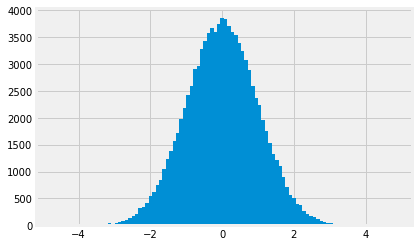

In [22]:
# Plot a histogram of several random normal samples from NumPy.

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

Take 1,000 samples using `np.random.lognormal(size=numsamples)` and plot them on a histogram.

In [31]:
# Plot a lognormal distribution generated with NumPy

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**